In [ ]:
# Install a pip package in the current Jupyter kernel - https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/
import sys
!{sys.executable} -m pip install matplotlib numpy
sys.path.append('.')
import plotUtil

Plot the coverage of cells (above a threshold).

In [6]:
import json
import numpy as np
import matplotlib.pyplot as plt
#json_file_path = '/Users/bthj/QD/conf-duration_delta_pitch_combinations/evolution-run-analysis_qd-scores,cell-scores,coverage,elite-generations,genome-statistics,genome-sets,variance,elites-energy,goal-switches,lineage,duration-pitch-delta-velocity-combinations_step-1000_thrshld_0.5_1685817612663.json'
# json_file_path = '/Users/bthj/QD/conf-static_mutation_rate_combinations/evolution-run-analysis_qd-scores,cell-scores,coverage,elite-generations,genome-statistics,genome-sets,variance,elites-energy,goal-switches,lineage,duration-pitch-delta-velocity-combinations_step-1000_thrshld_0.5_1685817614609.json'
# json_file_path = '/Users/bjornpjo/Developer/apps/kromosynth-cli/cli-app/conf/evolution-run-analysis_qd-scores,cell-scores,coverage,elite-generations,genome-statistics,genome-sets,variance,elites-energy,goal-switches,lineage,duration-pitch-delta-velocity-combinations_step-1000_1693487991208.json'
# json_file_path  = '/Users/bjornpjo/QD-Fox/conf-duration_delta_pitch_combinations-singleCellWin/evolution-run-analysis_coverage_step-1000_1696287202468.json'
# json_file_path = '/Users/bjornpjo/QD-Fox/analysis/evolution-run-analysis_qd-scores,cell-scores,coverage,genome-statistics,genome-sets,elites-energy,goal-switches_step-1000_1697488122792.json'
json_file_path = '/Users/bjornpjo/QD-Fox/analysis/evolution-run-analysis_coverage_step-10000_1697976323166.json'
x_multiplier = 1000  # Set this value as the step size in the JSON file name
# title as fourth path element from json_file_path
title = "coverage: " + json_file_path.split('/')[4]

# Read data from JSON file
data = plotUtil.read_data_from_json(json_file_path)

coverage_arrays = plotUtil.extract_data_arrays(data, 'coverage')

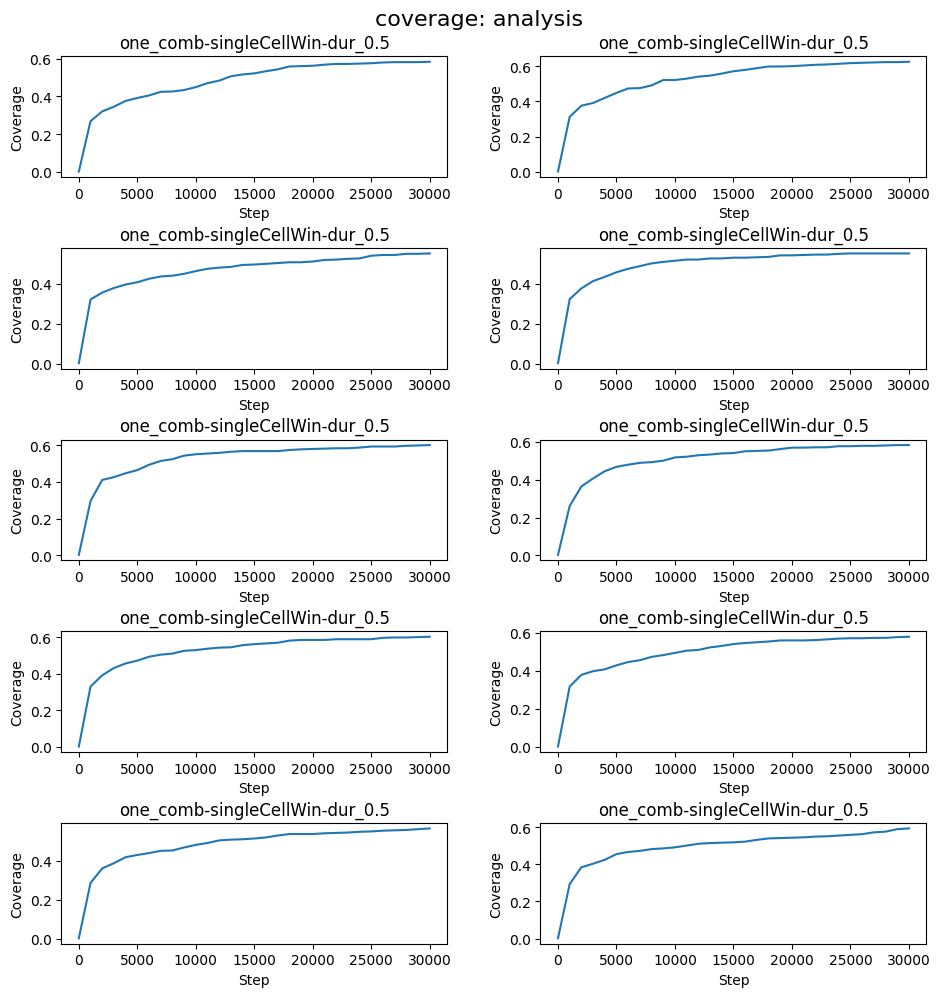

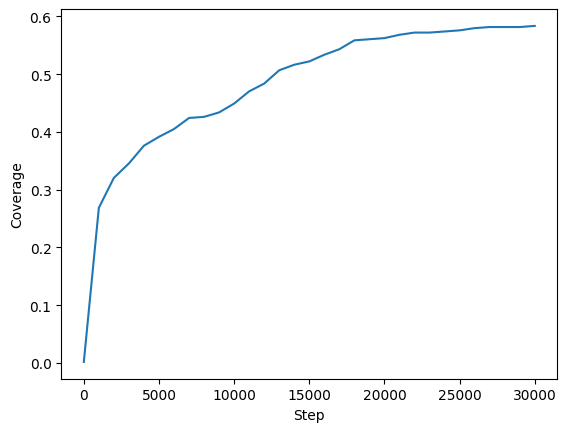

In [10]:
def coveragePlotFunc(plt, ax, x_values, array, title):
  if len(title) > 50:
    title = title[:50] + '\n' + title[50:]
    plt.subplots_adjust(hspace=0.4)
    # add space for the second line of the title
    plt.subplots_adjust(top=0.96)
  # ax.plot(x_values, array, label=title)
  ax.set_title(title)
  ax.plot(x_values, array)
  ax.set_xlabel('Step')
  ax.set_ylabel('Coverage')
  # ax.legend()

plotUtil.render_graphs(coverage_arrays, x_multiplier, coveragePlotFunc, 10, 10, title)



# Get the 1D coverage array from the JSON data at evoRuns[0].iterations[0].coverage
coverage = data['evoRuns'][0]['iterations'][0]['coverage']

# Plot the coverage as graph

plt.plot(np.arange(len(coverage)) * x_multiplier, coverage)
plt.xlabel('Step')
plt.ylabel('Coverage')
plt.show()

# Plot the coverage as a graph with a confidence interval
# - TODO: if there's data from multiple runs, plot the mean coverage and the confidence interval
# import matplotlib.pyplot as plt
# import numpy as np
# plt.plot(np.arange(len(coverage)) * x_multiplier, coverage)
# plt.xlabel('Step')
# plt.ylabel('Coverage')
# plt.fill_between(np.arange(len(coverage)) * x_multiplier, np.array(coverage) - np.array(data['evoRuns'][0]['iterations'][0]['coverageStd']), np.array(coverage) + np.array(data['evoRuns'][0]['iterations'][0]['coverageStd']), alpha=0.5)
# plt.show()



Plot aggregate coverage.

In [ ]:
coverageMeans = data['evoRuns'][0]['aggregates']['coverage']['means']
coverageStdDevs = data['evoRuns'][0]['aggregates']['coverage']['stdDevs']

x_values = np.arange(len(coverageMeans)) * x_multiplier

from scipy.stats import norm

# Plot the qdScore means with a confidence interval of 95%

# Define the confidence level and alpha
conf_level = 0.95
alpha = 1 - conf_level

# Calculate the half-width of the confidence interval
z_score = norm.ppf(1 - alpha/2)
half_width = z_score * np.array(coverageStdDevs, dtype=np.float64) / np.sqrt(len(coverageMeans))

# Calculate the upper and lower bounds of the confidence interval
upper_bound = coverageMeans + half_width
lower_bound = coverageMeans - half_width

# Plot the mean values as a line
plt.plot(x_values, coverageMeans) # plt.plot(x, y_means, '-o')

# Fill the area between the upper and lower bounds of the confidence interval
plt.fill_between(x_values, upper_bound, lower_bound, alpha=0.2)

# Add axes labels and a title
plt.xlabel('X-axis')
plt.ylabel('Iteration')
plt.title('Coverage means with 95% confidence interval')

# Display the plot
plt.show()